In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 24 11:07:19 2020

@author: hpakki
"""


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime as dt

input_path= r"C:/Users/hpakki/Desktop/migration/Assignment2/"


In [2]:
#Importing Data:
data=pd.read_csv(input_path+'loan.csv', low_memory= False)

In [3]:
# Any missing values?
data.isnull().values.any()
#Round the values and convert into missing percetnage
missing_percent=data.isna().mean().round(4) * 100
print(missing_percent)

#Checking the df "data" properties
data.info()
data.dtypes
data.count()
data.shape
data.columns
data.describe()

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

In [4]:
#Data Cleaning:
# Removing the columns having more than 90% missing values
missing_percent_90 = data.columns[100*(data.isnull().sum()/len(data.index)) > 90]
print(missing_percent_90)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [5]:
data = data.drop(missing_percent_90, axis=1)
#Checking for remaining missing values
100*(data.isnull().sum()/len(data.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [6]:
#Dropping Desc and mths_since_last_delinq as these are not required in further analysis
data = data.drop(['desc', 'mths_since_last_delinq'], axis=1)

#Converting dtypes of required columns:
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
data['loan_amnt']=data['loan_amnt'].astype(np.float16)
data['funded_amnt']=data['funded_amnt'].astype(np.float16)
data['funded_amnt_inv']=data['funded_amnt_inv'].astype(np.float16)

### Univariate Analysis on Loan Status Variable

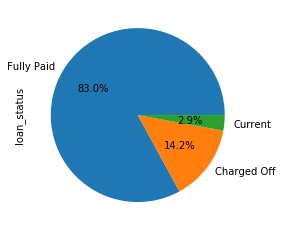

In [7]:
loan_status=data['loan_status'].value_counts()
loan_status_pct=100*data['loan_status'].value_counts(normalize= True)
loan_status_pct.plot.pie(autopct='%1.1f%%')

In [8]:
#Removing Current loans from loan_status to identify the default rate
loan=data[data['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# default rate in %
print(round(np.mean(loan['loan_status'])*100, 2))

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


14.59


C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Analysis of default_rate against different categorical variables:

In [9]:
#Defining a  function to plot default rate against different variables
def bar_plot(var):
    sns.barplot(x=var, y='loan_status', data=loan)
    plt.show()

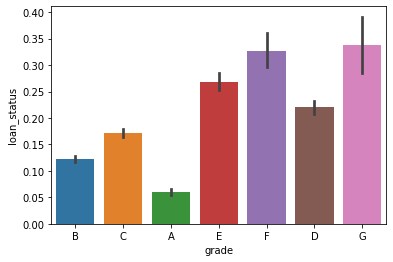

In [10]:
# plotting default rates across grade of the loan
bar_plot('grade')

#The risk of constomer defaulting the loan based on grade can be observed

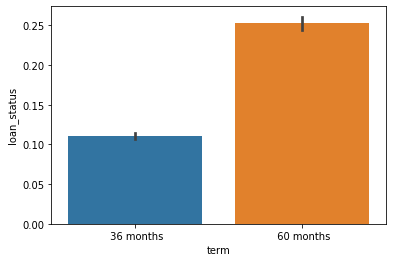

In [11]:
# compare default rates across grade of loan
bar_plot('term')

#Longer term loans are being defaulted more than short term loans

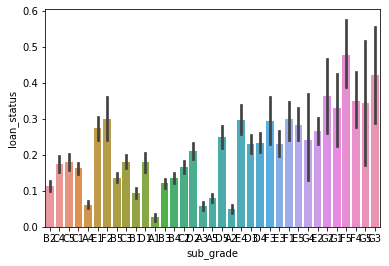

In [12]:
# compare default_rate across sub_grade
bar_plot('sub_grade')

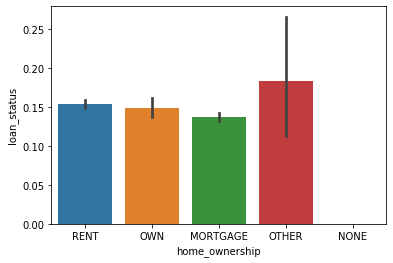

In [13]:
# default rates based on home ownership 
bar_plot('home_ownership')

#No significant difference based on home ownership

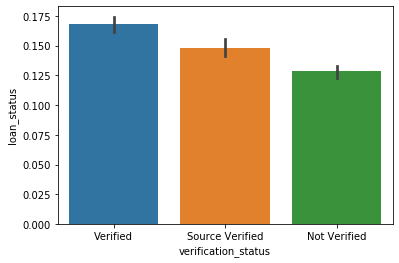

In [14]:
# default rate based on verification_status
bar_plot('verification_status')

#Verified people are defaulting more compared to not verified 

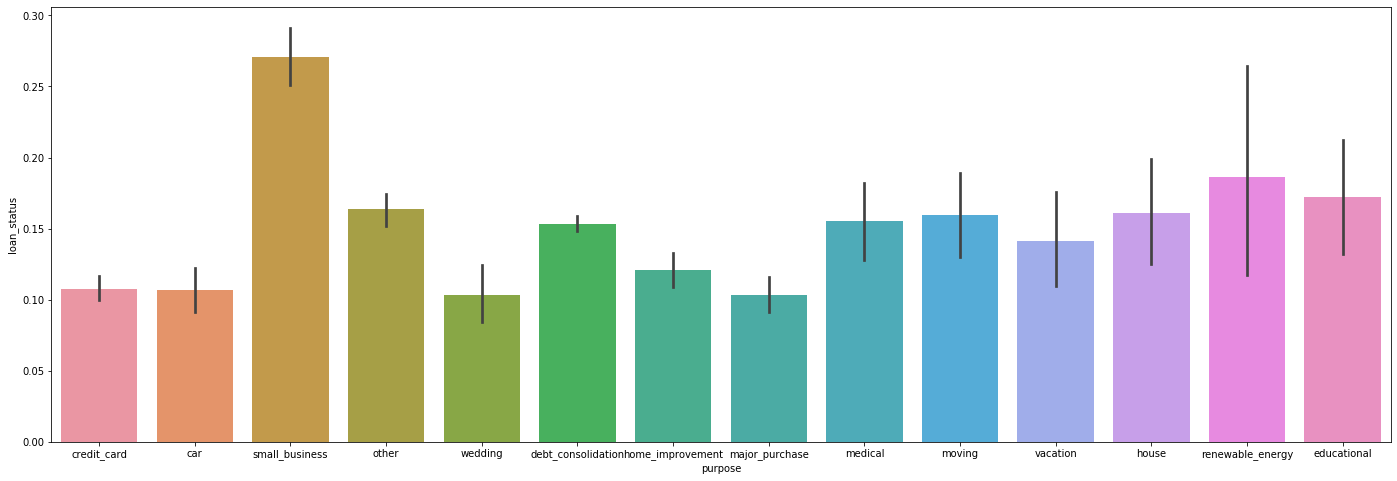

In [15]:
#default rate based on purpose (Bi-Variate Analysis)
plt.figure(figsize=(24, 8))
bar_plot('purpose')

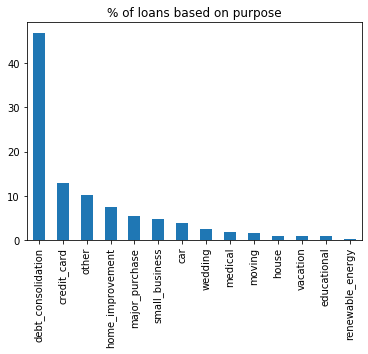

In [16]:
#Univariate Analysis on Purpose
purpose=data['purpose'].value_counts()
purpose_pct=100*data['purpose'].value_counts(normalize= True)
purpose_pct.plot.bar(title= '% of loans based on purpose')

1)Based on the above two plots, most of the loss is on small_business loans as they do not contribute in majority to the revenue and people tend to default most on this type of loan
2)The second most riskier loan is the renewable energy loans which again do not contribute much to the revenue.
3)The third loss could be due to educational loans

In [17]:
#Extracting year and month form loan issue date: (Creating derived cloumns for analysis)
loan['issue_d'] = loan['issue_d'].apply(lambda x: dt.strptime(x, '%b-%y'))
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [18]:
#Grouping the loans based on year of issue
loan_yr=loan.groupby('year').year.count()

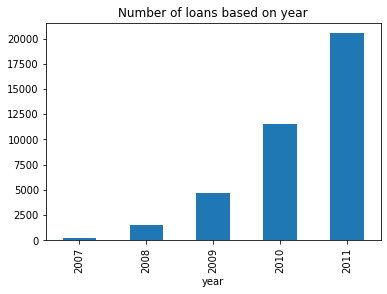

In [19]:
#Plotting the number of loans issued based on year
loan_yr.plot.bar(title='Number of loans based on year')

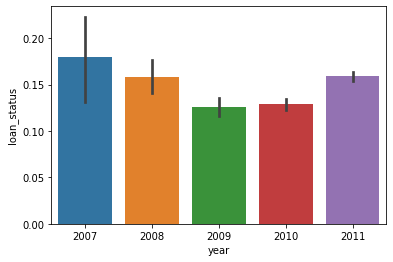

In [20]:
#Plotting default rate based on year
bar_plot('year')

In [21]:
# binning loan amount, funded_amnt_invested, funded_amnt
def binning(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: binning(x))
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda x: binning(x))
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: binning(x))

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

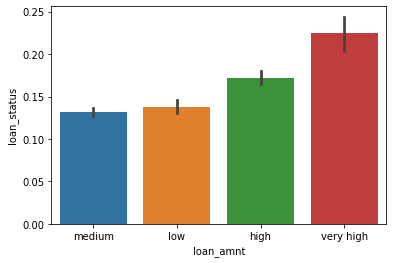

In [22]:
#plotting the default rate based on loan amount
bar_plot('loan_amnt')

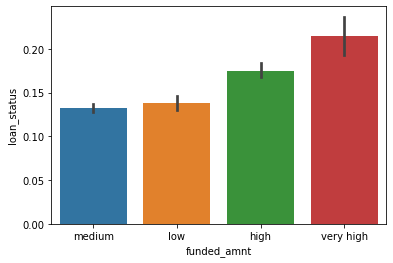

In [23]:
#Plotting the default rate based on funded_amnt
bar_plot('funded_amnt')

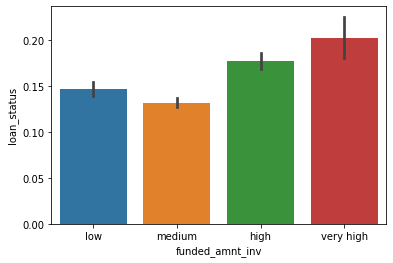

In [24]:
#plotting the default rate based on funded_amnt_inv
bar_plot('funded_amnt_inv')

In [25]:
# binning int_rate
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


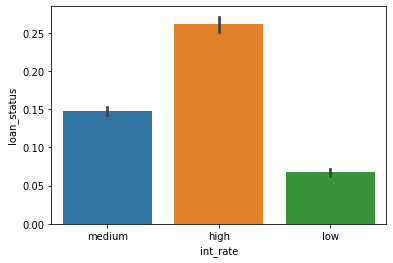

In [26]:
#Plotting the default rate against the interest rate
bar_plot('int_rate')

In [27]:
# Binning DTI ratios
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


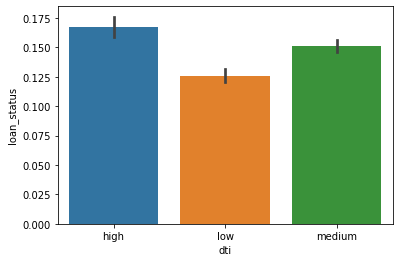

In [28]:
#Plotting default rate for debt to income ratio:
bar_plot('dti')

In [29]:
# Binning annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


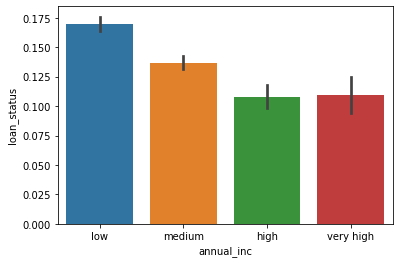

In [30]:
#Plotting Default Rate for different income groups
bar_plot('annual_inc')

In [31]:
# Binning installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

C:\Users\hpakki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


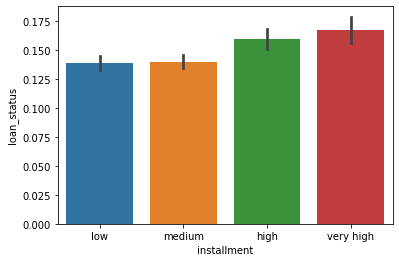

In [32]:
#Plotting default rate for installments
bar_plot('installment')

### Segmented Analysis

In [33]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

In [34]:
#Function which takes a categorical variable and plots the default rate segmented by purpose 

def plot_segmented(var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='loan_status', hue='purpose', data=loan)
    plt.show()


### Plots for default rate segmented for different variables

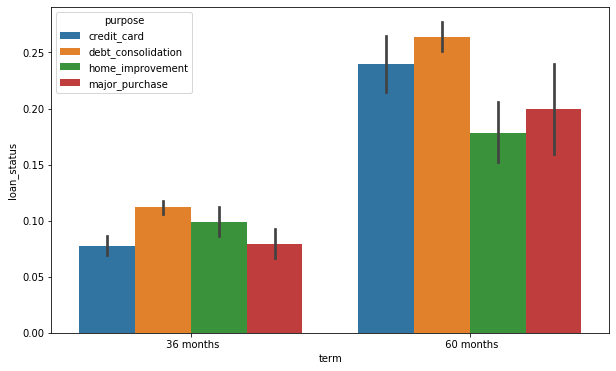

In [35]:
plot_segmented('term')

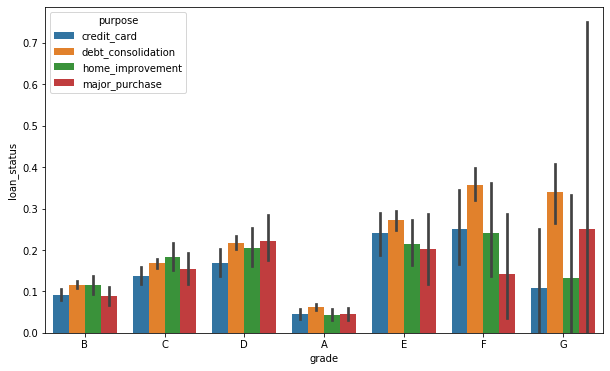

In [36]:
plot_segmented('grade')

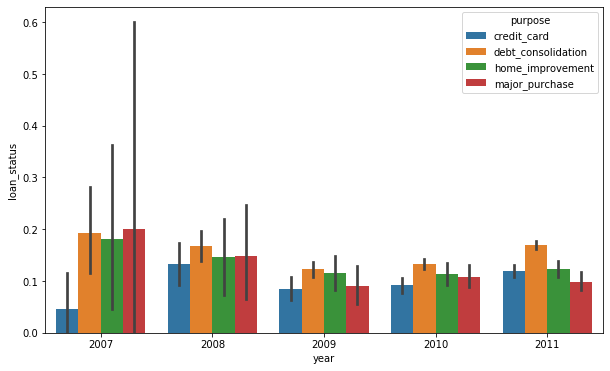

In [37]:
plot_segmented('year')

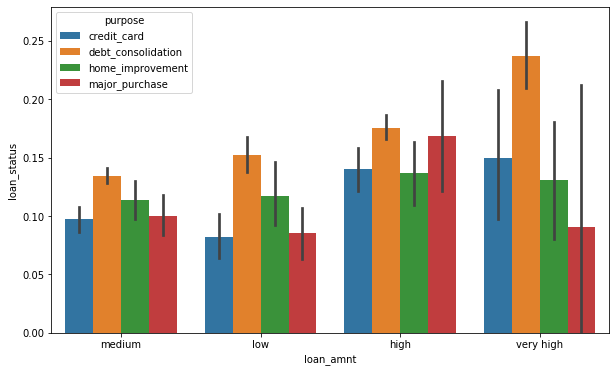

In [38]:
plot_segmented('loan_amnt')

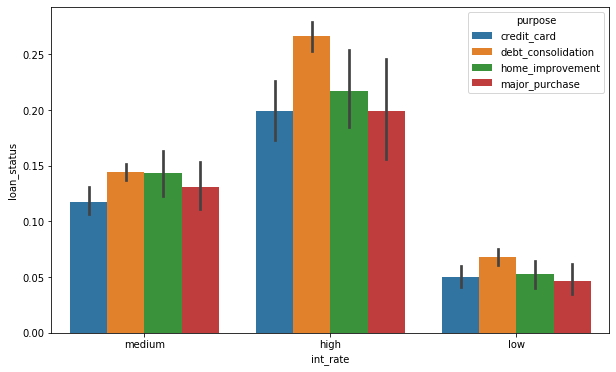

In [39]:
plot_segmented('int_rate')

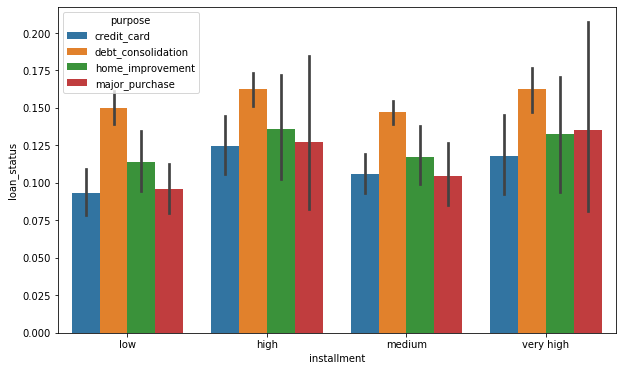

In [40]:
plot_segmented('installment')

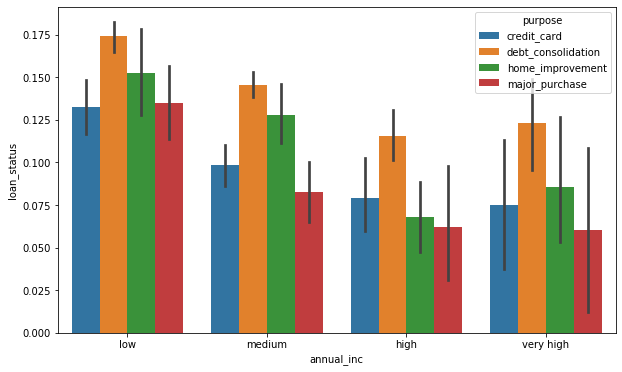

In [41]:
plot_segmented('annual_inc')

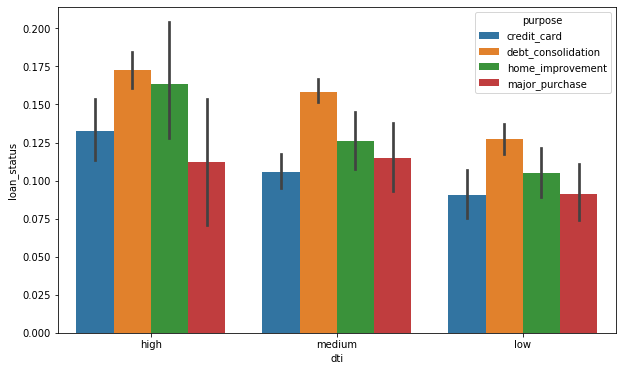

In [42]:
plot_segmented('dti')